# Simple Linear Regression Project

## Modelling the linear relationship between Sales and Advertising dataset

## Project overview
In this project, I build a Simple Linear Regression model to study the linear relationship between Sales and Advertising dataset for a dietary weight control product.

## Linear Regression
Linear Regression is a statistical technique which is used to find the linear relationship between dependent and one or more independent variables. This technique is applicable for Supervised learning Regression problems where we try to predict a continuous variable.

Linear Regression can be further classified into two types – Simple and Multiple Linear Regression. In this project, I employ Simple Linear Regression technique where I have one independent and one dependent variable. It is the simplest form of Linear Regression where we fit a straight line to the data.

## Simple Linear Regression (SLR)

Simple Linear Regression (or SLR) is the simplest model in machine learning. It models the linear relationship between the independent and dependent variables. 
In this project, there is one independent or input variable which represents the Sales data and is denoted by X. Similarly, there is one dependent or output variable which represents the Advertising data and is denoted by y. We want to build a linear relationship between these variables. This linear relationship can be modelled by mathematical equation of the form:- Y = β0 + β1*X ------------- (1)

In this equation, X and Y are called independent and dependent variables respectively,

β1 is the coefficient for independent variable and

β0 is the constant term.

β0 and β1 are called parameters of the model.

For simplicity, we can compare the above equation with the basic line equation of the form:-

               y = ax + b       ----------------- (2)
We can see that

slope of the line is given by, a = β1, and

intercept of the line by b = β0.

In this Simple Linear Regression model, we want to fit a line which estimates the linear relationship between X and Y. So, the question of fitting reduces to estimating the parameters of the model β0 and β1.

## The problem statement
The aim of building a machine learning model is to solve a problem and to define a metric to measure model performance.

The problem is to model and investigate the linear relationship between Sales and Advertising dataset for a dietary weight control product.

I have used two performance metrics RMSE (Root Mean Square Value) and R2 Score value to compute our model performance.

In [14]:
# importing the necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# About the dataset
The data set has been imported from the econometrics website with the following url:-

http://www.econometrics.com/intro/sales.htm

This data set contains Sales and Advertising expenditures for a dietary weight control product. It contains monthly data for 36 months. The variables in this data set are Sales and Advertising.

In [124]:
#importing the dataset
url = "https://www.econometrics.com/intro/SALES.txt"
header_row = ['Sales','Advertising']
df = pd.read_csv(url,names=header_row,delim_whitespace=True)


C:\Users\Charles\AppData\Local\Temp\ipykernel_5092\1357941663.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url,names=header_row,delim_whitespace=True)


## Exploratory Data Analysis


In [127]:
df.shape

(36, 2)

In [129]:
df.head()

,Sales,Advertising
0,12.0,15.0
1,20.5,16.0
2,21.0,18.0
3,15.5,27.0
4,15.3,21.0


In [141]:
# dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        36 non-null     float64
 1   Advertising  36 non-null     float64
dtypes: float64(2)
memory usage: 708.0 bytes


In [145]:
# descriptive analysis 
df.describe()

,Sales,Advertising
count,36.000000,36.000000
mean,24.255556,28.527778
std,6.185118,18.777625
min,12.000000,1.000000
25%,20.300000,15.750000
50%,24.250000,23.000000
75%,28.600000,41.000000
max,36.500000,65.000000


## Independent and Dependent Variables
In this project, we will  refer Independent variable as Feature variable and Dependent variable as Target variable. These variables are also recognized by different names as follows: 

## Independent variable

Independent variable is also called Input variable and is denoted by X. In practical applications, independent variable is also called Feature variable or Predictor variable. We can denote it as:-

Independent or Input variable (X) = Feature variable = Predictor variable


## Dependent variable
Dependent variable is also called Output variable and is denoted by y.

Dependent variable is also called Target variable or Response variable. It can be denoted it as follows:-

Dependent or Output variable (y) = Target variable = Response variable

In [148]:
# Declaring features variable and Target Variable
x=df['Sales'].values
y=df['Advertising'].values

## Visual Exploratory data analysis

Text(0.5, 1.0, 'Relationship Betweem Sales and Advertising')

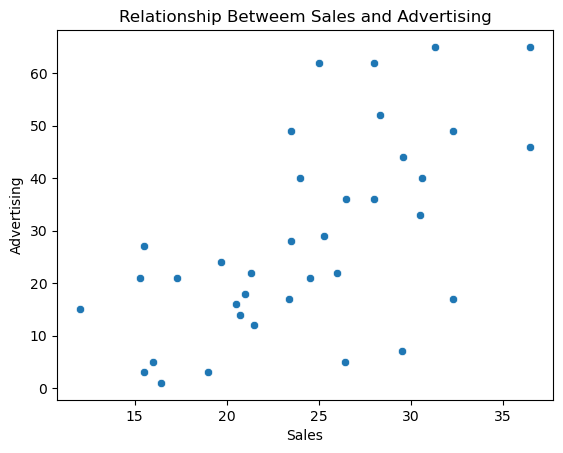

In [157]:
# Ploting a scatter plot between x and y
sns.scatterplot(data=df,x='Sales',y='Advertising')
plt.title('Relationship Betweem Sales and Advertising')

## Checking dimensions of X and y
We need to check the dimensions of X and y to make sure they are in right format for Scikit-Learn API.

It is an important precursor to model building.

In [162]:
# Print the dimensions of X and y

print(x.shape)
print(y.shape)

(36,)
(36,)


## Reshaping X and y
Since we are working with only one feature variable, so we need to reshape using Numpy reshape() method.

It specifies first dimension to be -1, which means "unspecified".

Its value is inferred from the length of the array and the remaining dimensions.

In [167]:
# Reshape X and y

x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [169]:
# Print the dimensions of X and y after reshaping

print(x.shape)
print(y.shape)

(36, 1)
(36, 1)


In [175]:
# importing Sklearn 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error ,r2_score

## Train Test Split
will split the dataset into two sets namely - train set and test set.

The model learn the relationships from the training data and predict on test data.

In [184]:
# Split x and y into training and test data sets 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [194]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 1)
(12, 1)
(24, 1)
(12, 1)


## Mechanics of the model
I split the dataset into two sets – the training set and the test set. Then, I instantiate the regressor lm and fit it on the training set with the fit method.

In this step, the model learned the relationships between the training data (X_train, y_train).

Now the model is ready to make predictions on the test data (X_test). Hence, I predict on the test data using the predict method.

In [199]:
#training the model using training datasets 
lm=LinearRegression()
lm.fit(x_train,y_train)


LinearRegression()

In [201]:
#predict on the datasets
y_pred=lm.predict(x_test)

## Model slope and intercept term
The model slope is given by lm.coef_ and model intercept term is given by lm.intercept_.

The estimated model slope and intercept values are 1.60509347 and -11.16003616.

So, the equation of the fitted regression line is

y = 1.60509347 * x - 11.16003616

In [204]:
# Computing the model slope and intercept
a=lm.coef_
b=lm.intercept_

In [210]:
print('Estimated model slope:', a)
print('Estimated model intercept:', b)


Estimated model slope: [[1.60509347]]
Estimated model intercept: [-11.16003616]


In [212]:
# So, our fitted regression line is 

# y = 1.60509347 * x - 11.16003616 

# That is our linear model.

## Making predictions
I have predicted the Advertising values on first five 5 Sales datasets by writing code

	lm.predict(X) [0:5]  
    
If I remove [0:5], then I will get predicted Advertising values for the whole Sales dataset.

To make prediction, on an individual Sales value, I write

	lm.predict(Xi)
    
where Xi is the Sales data value of the ith observation.

In [217]:
#Predicting  Advertising Values 
lm.predict(x)[0:5]
# predicting Advertising values on first five sales values 

array([[ 8.10108551],
       [21.74438002],
       [22.54692675],
       [13.71891266],
       [13.39789396]])

In [227]:
#To make an individual row prediction using the linear regression model 
print(str(lm.predict(np.array([24]).reshape(-1, 1))))  # Reshape 24 into a 2D array with shape (1, 1)

[[27.36220717]]


## Regression metrics for model performance
Now, it is the time to evaluate model performance.

For regression problems, there are two ways to compute the model performance. They are RMSE (Root Mean Square Error) and R-Squared Value. These are explained below:-
## RMSE

RMSE is the standard deviation of the residuals. So, RMSE gives us the standard deviation of the unexplained variance by the model. It can be calculated by taking square root of Mean Squared Error. RMSE is an absolute measure of fit. It gives us how spread the residuals are, given by the standard deviation of the residuals. The more concentrated the data is around the regression line, the lower the residuals and hence lower the standard deviation of residuals. It results in lower values of RMSE. So, lower values of RMSE indicate better fit of data.

In [234]:
# Calculating the root mean square error (RMSE)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print('RMSE Value:',rmse)

RMSE Value: 11.227260890598618


## R2 Score

R2 Score is another metric to evaluate performance of a regression model. It is also called coefficient of determination. It gives us an idea of goodness of fit for the linear regression models. It indicates the percentage of variance that is explained by the model.

Mathematically,

R2 Score = Explained Variation/Total Variation

In general, the higher the R2 Score value, the better the model fits the data. Usually, its value ranges from 0 to 1. So, we want its value to be as close to 1. Its value can become negative if our model is wrong.

In [237]:
#Calculating the R2 score 
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_pred)))


R2 Score value: 0.5789


## interpretation and Conclusion
The RMSE value has been found to be 11.2273. It means the standard deviation for our prediction is 11.2273. So, sometimes we expect the predictions to be off by more than 11.2273 and other times we expect less than 11.2273. So, the model is not good fit to the data.

In business decisions, the benchmark for the R2 score value is 0.7. It means if R2 score value >= 0.7, then the model is good enough to deploy on unseen data whereas if R2 score value < 0.7, then the model is not good enough to deploy. Our R2 score value has been found to be .5789. It means that this model explains 57.89 % of the variance in our dependent variable. So, the R2 score value confirms that the model is not good enough to deploy because it does not provide good fit to the data.

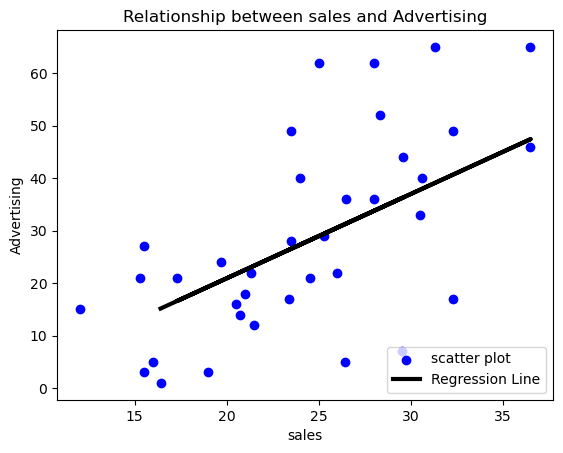

In [242]:
# Plot the Regression Line
plt.scatter(x,y,c='blue',label='scatter plot')
plt.plot(x_test,y_pred,color='black',lw=3,label='Regression Line')
plt.title('Relationship between sales and Advertising')
plt.xlabel('sales')
plt.ylabel('Advertising')
plt.legend(loc=4)

## Residual analysis
A linear regression model may not represent the data appropriately. The model may be a poor fit to the data. So, we should validate our model by defining and examining residual plots.

The difference between the observed value of the dependent variable (y) and the predicted value (ŷi) is called the residual and is denoted by e. The scatter-plot of these residuals is called residual plot.

If the data points in a residual plot are randomly dispersed around horizontal axis and an approximate zero residual mean, a linear regression model may be appropriate for the data. Otherwise a non-linear model may be more appropriate.

If we take a look at the generated ‘Residual errors’ plot, we can clearly see that the train data plot pattern is non-random. Same is the case with the test data plot pattern. So, it suggests a better-fit for a non-linear model.

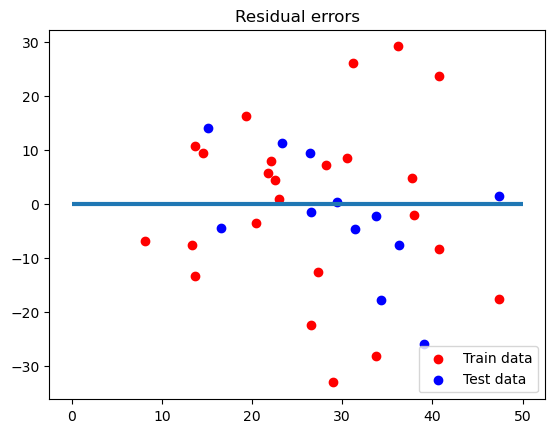

In [245]:
# Plotting residual errors

plt.scatter(lm.predict(x_train), lm.predict(x_train) - y_train, color = 'red', label = 'Train data')
plt.scatter(lm.predict(x_test), lm.predict(x_test) - y_test, color = 'blue', label = 'Test data')
plt.hlines(xmin = 0, xmax = 50, y = 0, linewidth = 3)
plt.title('Residual errors')
plt.legend(loc = 4)
plt.show()

## Checking for Overfitting and Underfitting
I calculate training set score as 0.2861. Similarly, I calculate test set score as 0.5789. The training set score is very poor. So, the model does not learn the relationships appropriately from the training data. Thus, the model performs poorly on the training data. It is a clear sign of Underfitting. Hence, I validated my finding that the linear regression model does not provide good fit to the data.

Underfitting means our model performs poorly on the training data. It means the model does not capture the relationships between the training data. This problem can be improved by increasing model complexity. We should use more powerful models like Polynomial regression to increase model complexity.

In [254]:
# Checking for Overfitting or Underfitting the data
print('Training set score: ',lm.score(x_train,y_train))
print('Test set score: ',lm.score(x_test,y_test))

Training set score:  0.2861319267488459
Test set score:  0.5789222227665716


In [260]:
# Save model for future use
import joblib
joblib.dump(lm, 'lm_regressor.pkl')

['lm_regressor.pkl']